In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
#df = pd.read_csv('/content/drive/MyDrive/Banco de Dados/DelayedFlights.csv')
df = pd.read_csv('C:\Projetos\projeto_5---Estatistica\DelayedFlights.zip')
df.drop(columns=['Unnamed: 0','Year'], inplace=True)

In [86]:
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [87]:
df['DepTime'] = df['DepTime'].astype(str)
df['CRSDepTime'] = df['CRSDepTime'].astype(str)
df['ArrTime'] = df['ArrTime'].astype(str)
df['CRSArrTime'] = df['CRSArrTime'].astype(str)

# Convertendo as strings para objetos de tempo do pandas
df['DepTime'] = pd.to_datetime(df['DepTime'], format='%H%M.%f', errors='coerce')
df['CRSDepTime'] = pd.to_datetime(df['CRSDepTime'], format='%H%M', errors='coerce')
df['ArrTime'] = pd.to_datetime(df['ArrTime'], format='%H%M.%f', errors='coerce')
df['CRSArrTime'] = pd.to_datetime(df['CRSArrTime'], format='%H%M', errors='coerce')

# Formatando os objetos de tempo no formato de 24 horas
df['DepTime'] = df['DepTime'].dt.strftime('%H:%M')
df['CRSDepTime'] = df['CRSDepTime'].dt.strftime('%H:%M')
df['ArrTime'] = df['ArrTime'].dt.strftime('%H:%M')
df['CRSArrTime'] = df['CRSArrTime'].dt.strftime('%H:%M')

In [88]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.drop(columns=['Month','DayofMonth','DayOfWeek','Cancelled','Diverted','FlightNum'], inplace=True)

metricas = {}

# Loop sobre as colunas do DataFrame
for coluna in df_numeric.columns:
    metricas[coluna] = {
        "Média": df[coluna].mean(),
        "Desvio padrão": df[coluna].std(),
        "Mínimo": df[coluna].min(),
        "Q1": df[coluna].quantile(0.25),
        "Mediana": df[coluna].median(),
        "Q3": df[coluna].quantile(0.75),
        "IQR": df[coluna].quantile(0.75) - df[coluna].quantile(0.25),
        "Máximo": df[coluna].max(),
        "Skewness": df[coluna].skew(),
        "Moda": df[coluna].mode()[0]
    }

df_metricas = pd.DataFrame(metricas).T
df_metricas

,Média,Desvio padrão,Mínimo,Q1,Mediana,Q3,IQR,Máximo,Skewness,Moda
ActualElapsedTime,133.305863,72.060069,14.0,80.0,116.0,165.0,85.0,1114.0,1.427101,80.0
CRSElapsedTime,134.302744,71.341439,-25.0,82.0,116.0,165.0,83.0,660.0,1.439987,75.0
AirTime,108.277147,68.642610,0.0,58.0,90.0,137.0,79.0,1091.0,1.495251,45.0
ArrDelay,42.199885,56.784715,-109.0,9.0,24.0,56.0,47.0,2461.0,3.948780,10.0
DepDelay,43.185176,53.402502,6.0,12.0,24.0,53.0,41.0,2467.0,4.495078,6.0
Distance,765.686159,574.479653,11.0,338.0,606.0,998.0,660.0,4962.0,1.545780,337.0
TaxiIn,6.812975,5.273595,0.0,4.0,6.0,8.0,4.0,240.0,6.003436,4.0
TaxiOut,18.232203,14.338534,0.0,10.0,14.0,21.0,11.0,422.0,4.502010,11.0
CarrierDelay,19.179399,43.546207,0.0,0.0,2.0,21.0,21.0,2436.0,7.415844,0.0
WeatherDelay,3.703571,21.492900,0.0,0.0,0.0,0.0,0.0,1352.0,12.559735,0.0


In [92]:
dados = {
    'Variável': ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 
                 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
                 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
    'Descrição': ['Hora real de partida do voo', 'Hora prevista de partida do voo', 
                  'Hora real de chegada do voo', 'Hora prevista de chegada do voo', 
                  'Tempo real de voo em minutos', 'Tempo previsto de voo em minutos',
                  'Tempo de voo em minutos', 'Atraso na chegada do voo em minutos', 
                  'Atraso na partida do voo em minutos', 'Distância do voo em milhas', 
                  'Tempo gasto taxiando após o pouso em minutos', 
                  'Tempo gasto taxiando antes da decolagem em minutos', 
                  'Atraso causado pela companhia aérea em minutos', 
                  'Atraso causado pelo clima em minutos', 
                  'Atraso causado pelo sistema de controle de tráfego aéreo em minutos', 
                  'Atraso causado por questões de segurança em minutos', 
                  'Atraso causado por chegada tardia da aeronave anterior em minutos']
}
df_descricao = pd.DataFrame(dados)

IndexError: index 17 is out of bounds for axis 0 with size 17

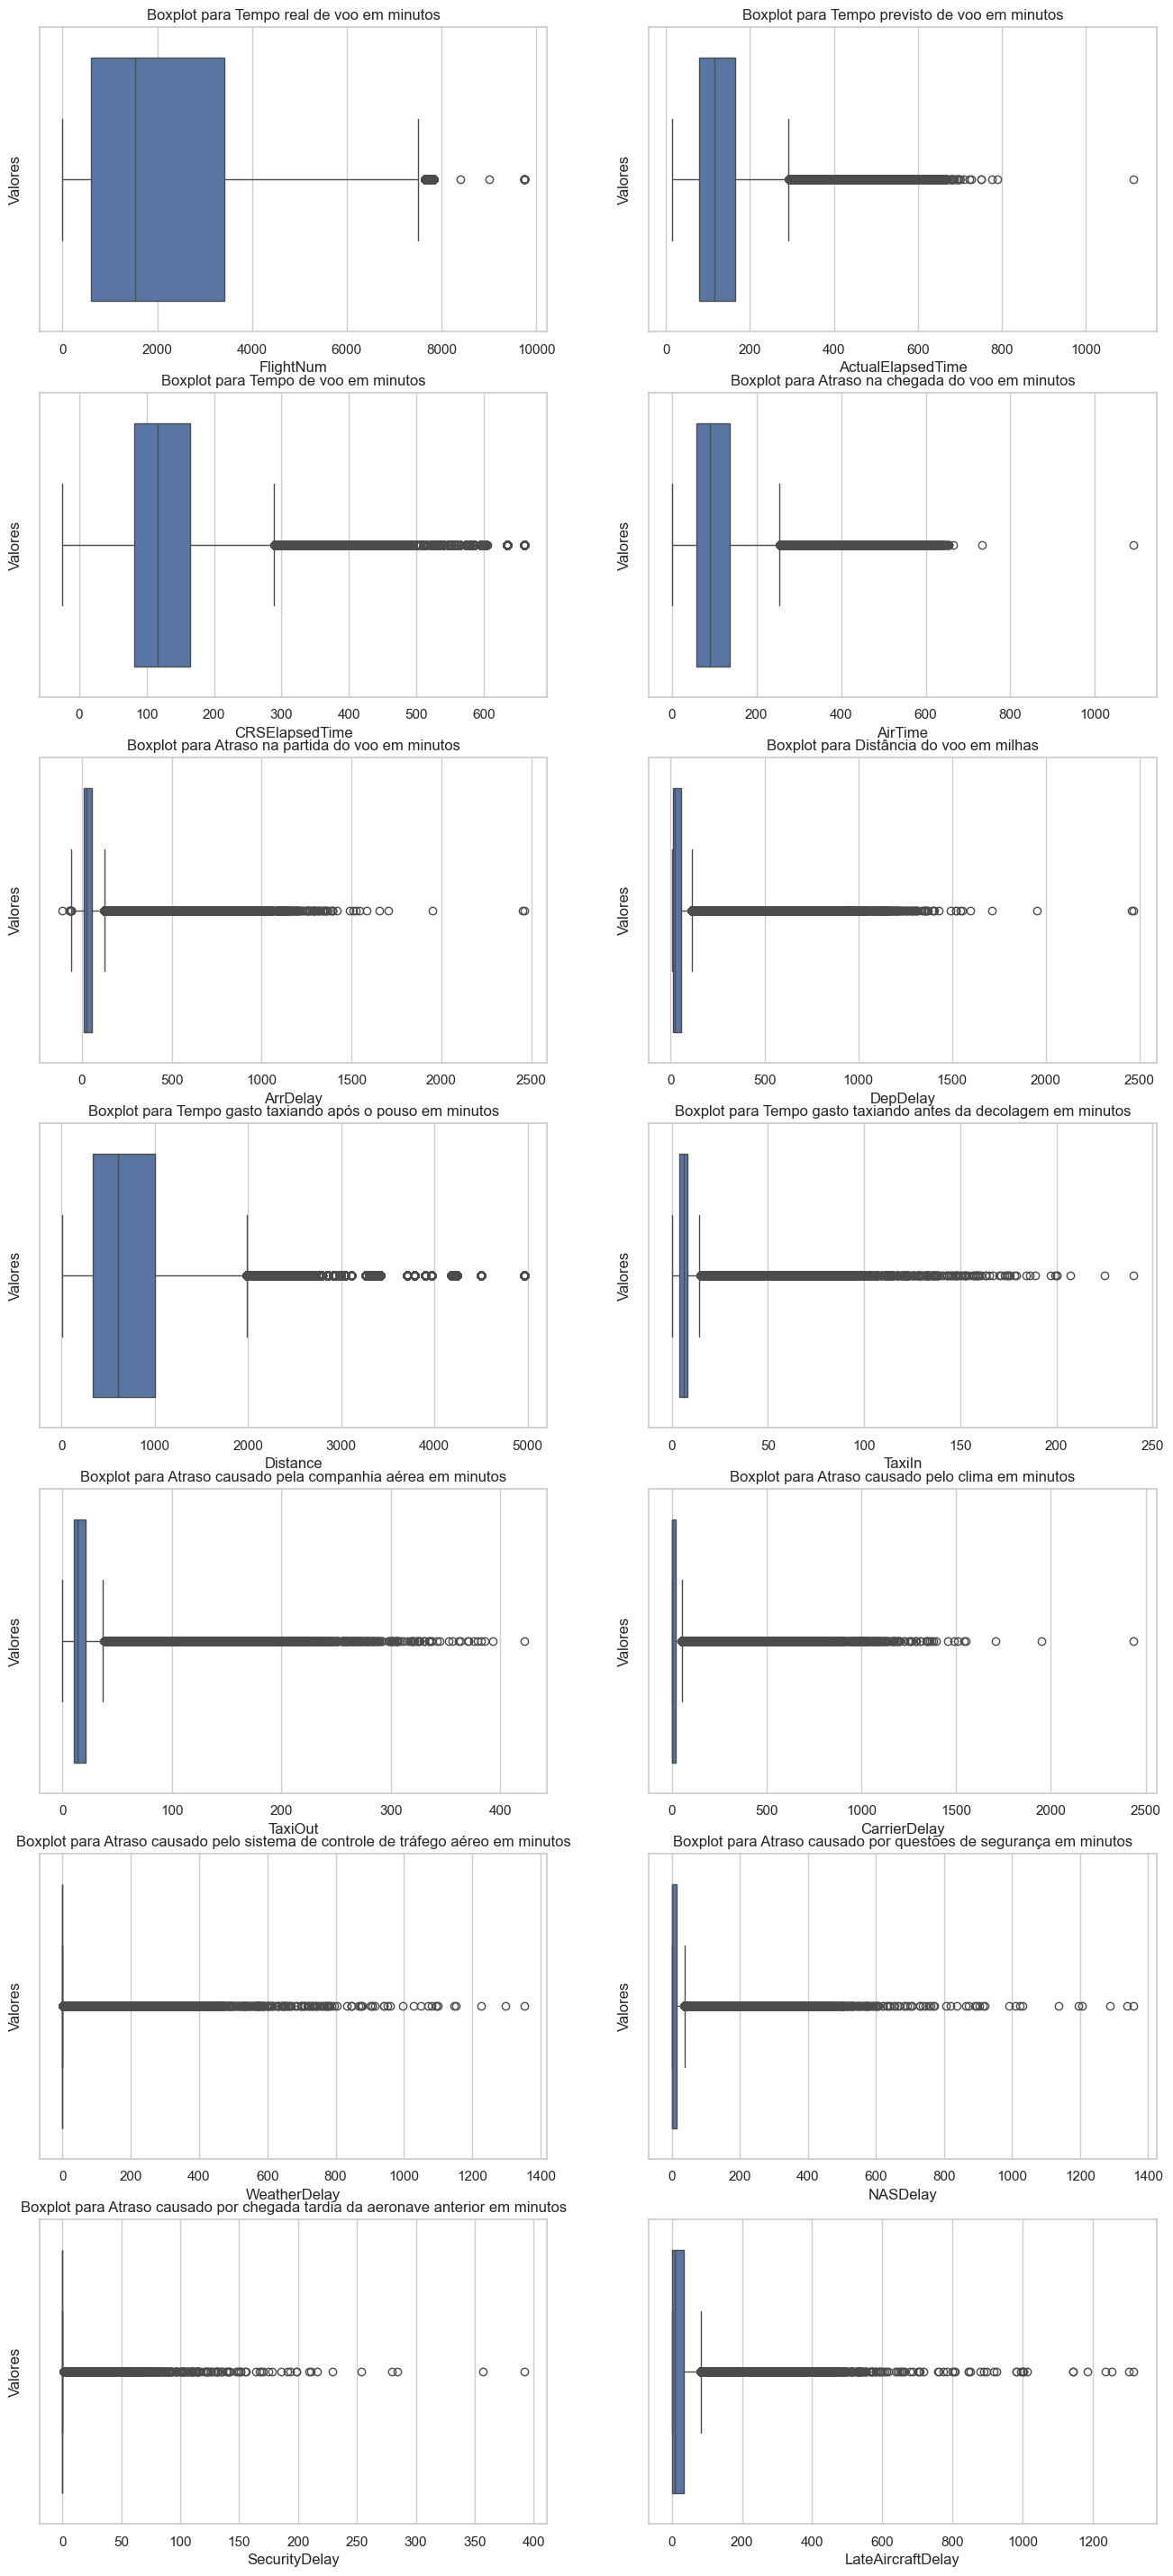

In [93]:
sns.set(style="whitegrid")

# Calcular o número de linhas e colunas dos subplots
num_colunas = len(df_boxplot.columns)
num_linhas = (num_colunas - 5 + 1) // 2  # Ajuste para começar da quinta coluna

# Criar uma figura e eixos de subplots
fig, axs = plt.subplots(nrows=num_linhas, ncols=2, figsize=(16, 36))

# Iterar sobre as colunas do DataFrame a partir da quinta coluna
for i, coluna in enumerate(df_boxplot.columns[4:], start=4):  # Começa na quinta coluna
    # Calcular a posição do subplot atual
    linha = (i - 4) // 2  # Ajuste para começar da quinta coluna
    col = (i - 4) % 2     # Ajuste para começar da quinta coluna
    # Criar o boxplot para cada coluna na posição correta do subplot
    sns.boxplot(x=df_boxplot[coluna], ax=axs[linha, col])  # Plota o boxplot para a coluna especificada
    # Obter o título correto da coluna no DataFrame de descrição
    titulo = df_descricao.iloc[df_boxplot.columns.get_loc(coluna), 1]  # Obter a descrição usando o índice da coluna
    axs[linha, col].set_title(f'Boxplot para {titulo}')  # Define o título do gráfico
    axs[linha, col].set_ylabel('Valores')        # Define o rótulo do eixo y

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()  # Exibe o gráfico

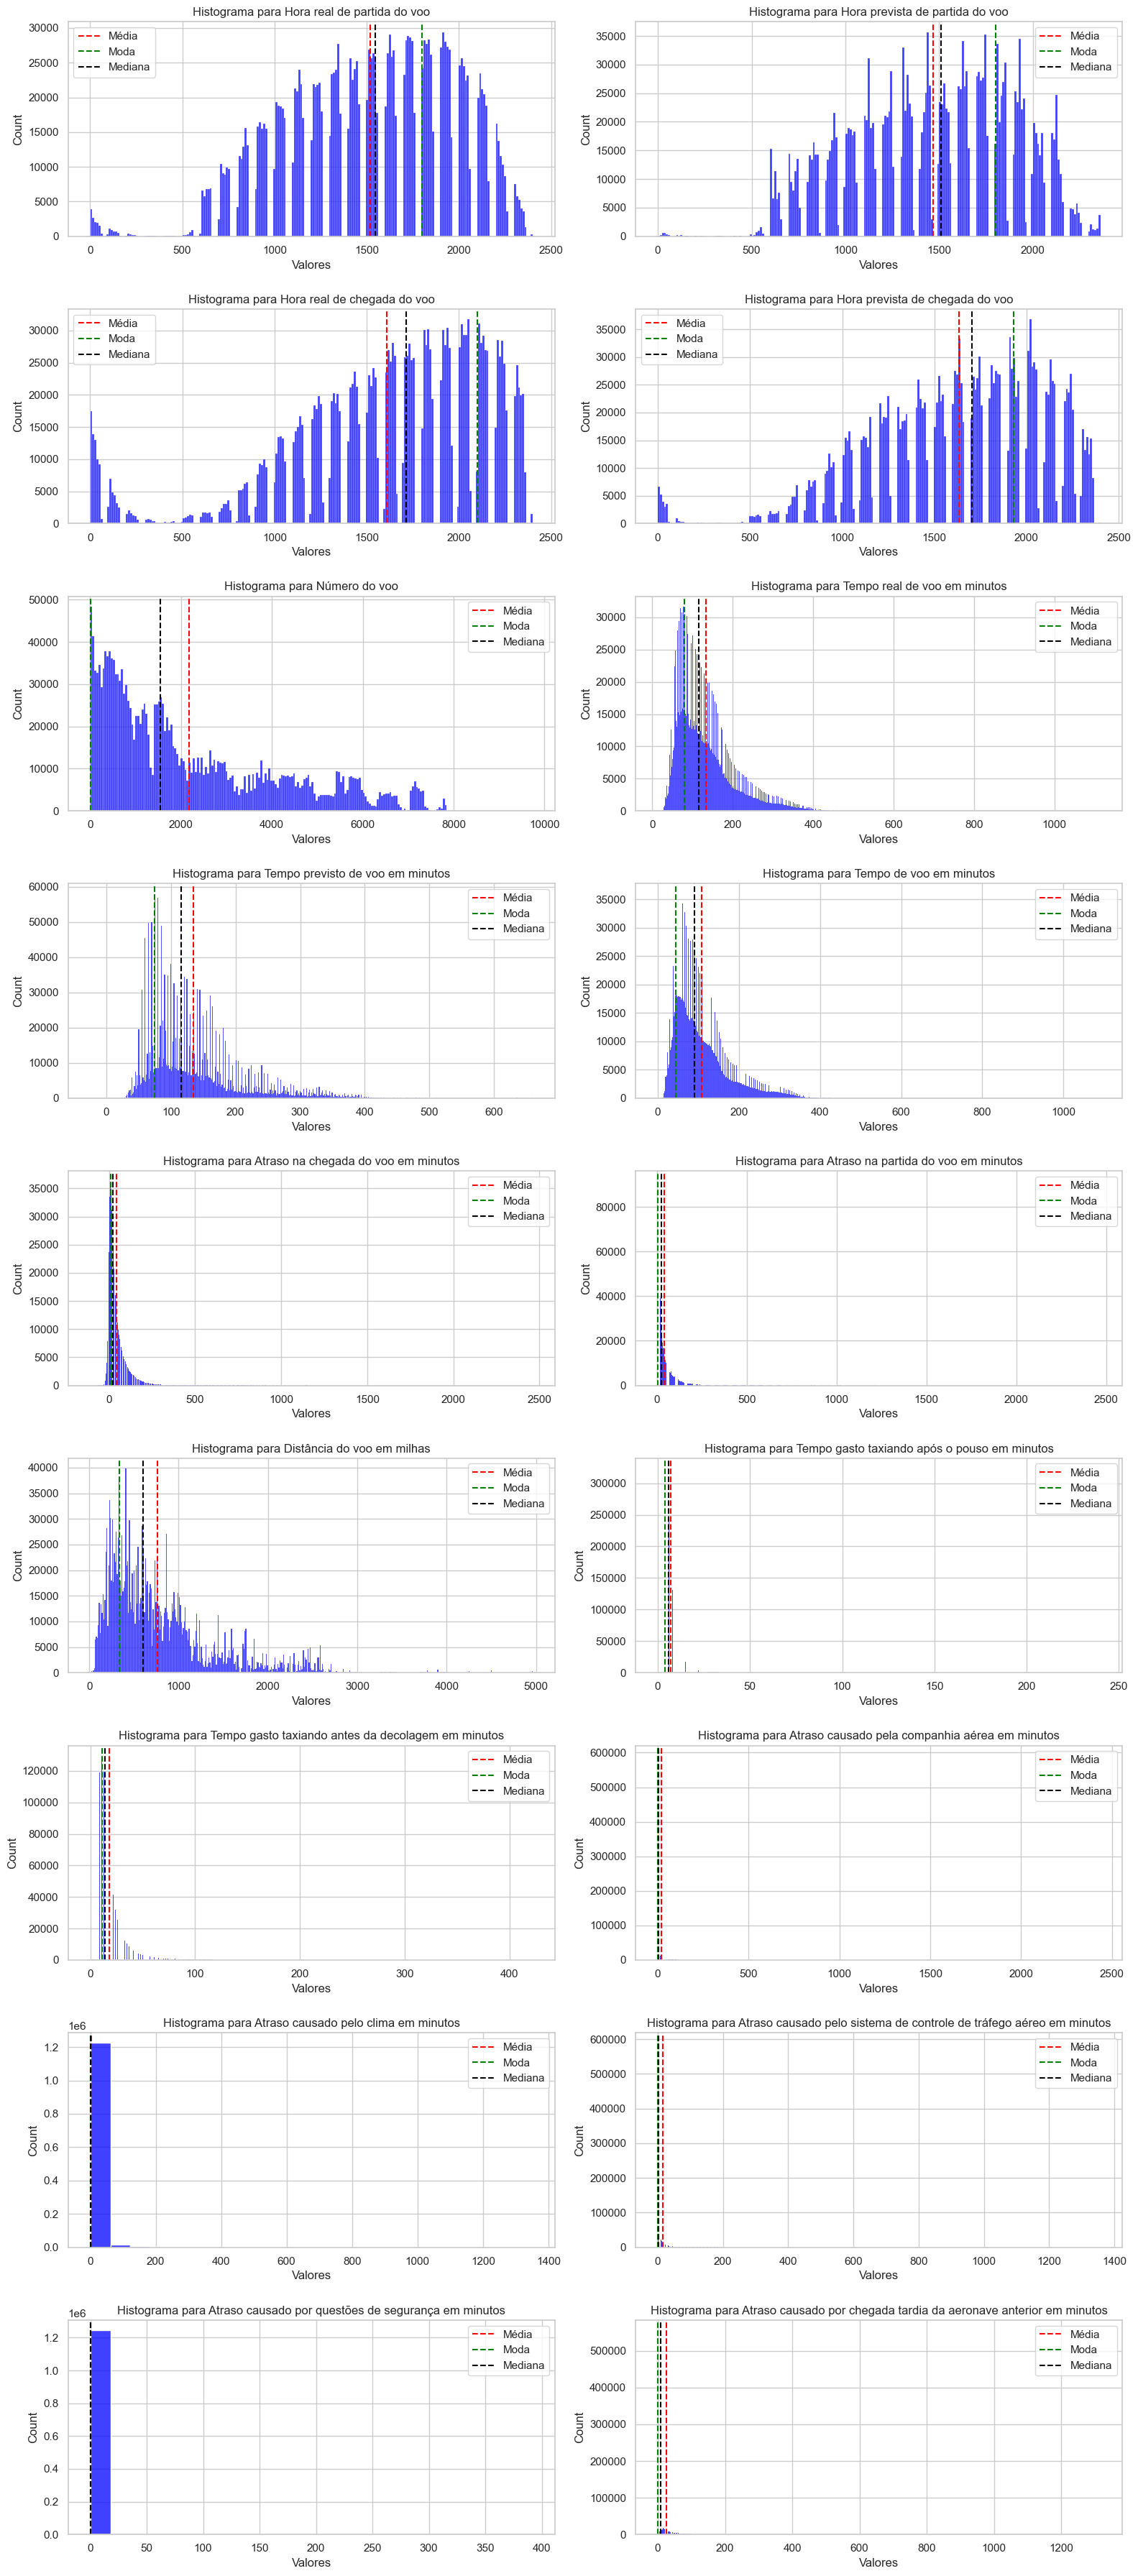

In [83]:
sns.set(style="whitegrid")

# Calcular o número de linhas e colunas dos subplots
num_colunas = len(df_boxplot.columns)
num_linhas = (num_colunas + 1) // 2  # Arredonda para cima a divisão por 2

# Criar uma figura e eixos de subplots
fig, axs = plt.subplots(nrows=num_linhas, ncols=2, figsize=(16, 36))

# Iterar sobre as colunas do DataFrame
for i, coluna in enumerate(df_boxplot.columns):
    # Calcular a posição do subplot atual
    linha = i // 2
    col = i % 2
    # Criar o gráfico de barras para cada coluna na posição correta do subplot
    sns.histplot(df_boxplot[coluna], ax=axs[linha, col], kde=False, color='blue')  # Plota o histograma para a coluna especificada
    
    # Adiciona linhas para média, moda e mediana
    mean = df_boxplot[coluna].mean()
    mode = df_boxplot[coluna].mode().iloc[0]
    median = df_boxplot[coluna].median()
    axs[linha, col].axvline(mean, color='red', linestyle='--', label='Média')  # Adiciona linha para média
    axs[linha, col].axvline(mode, color='green', linestyle='--', label='Moda')  # Adiciona linha para moda
    axs[linha, col].axvline(median, color='black', linestyle='--', label='Mediana')  # Adiciona linha para mediana
    
    # Obter o título correto da coluna no DataFrame de descrição
    titulo = df_descricao.iloc[df_boxplot.columns.get_loc(coluna), 1]  # Obter a descrição usando o índice da coluna
    axs[linha, col].set_title(f'Histograma para {titulo}')  # Define o título do gráfico
    axs[linha, col].set_xlabel('Valores')  # Define o rótulo do eixo x
    axs[linha, col].legend()  # Adiciona legenda

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show() 

In [ ]:
'Cancelled','Diverted']